In [ ]:
!nvidia-smi

Mon Nov 13 16:25:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Get the data**
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.


The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier

In [ ]:
#Get teh data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


#unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-13 16:26:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.2MB/s    in 5.9s    

2023-11-13 16:26:07 (17.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/



pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!ls pizza_steak/test/steak/

100274.jpg   148595.jpg   2138503.jpg  2752603.jpg  3173402.jpg  3873655.jpg  66858.jpg
1012080.jpg  1498778.jpg  2144308.jpg  2756200.jpg  321090.jpg	 3901703.jpg  670345.jpg
1016217.jpg  1499273.jpg  219196.jpg   2772358.jpg  3235645.jpg  3903517.jpg  673127.jpg
1064847.jpg  1515274.jpg  2193535.jpg  277297.jpg   324862.jpg	 3905395.jpg  690177.jpg
1082384.jpg  1523026.jpg  2198931.jpg  2802460.jpg  3293212.jpg  391144.jpg   690477.jpg
108310.jpg   1627703.jpg  221604.jpg   2814314.jpg  3293650.jpg  39461.jpg    697562.jpg
1094883.jpg  1653815.jpg  2229090.jpg  281731.jpg   3297938.jpg  399377.jpg   7056.jpg
1107549.jpg  1655387.jpg  2246332.jpg  2821155.jpg  3315737.jpg  400530.jpg   717293.jpg
1118585.jpg  1662212.jpg  2276476.jpg  2824517.jpg  3343970.jpg  400951.jpg   721500.jpg
1163050.jpg  168551.jpg   2285106.jpg  2825105.jpg  3352834.jpg  401660.jpg   730464.jpg
1166047.jpg  1687010.jpg  228683.jpg   284097.jpg   3383942.jpg  40947.jpg    746921.jpg
1190808.jpg  1718949.jpg  

In [ ]:
import os

# walk through pizza_steak directory & list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


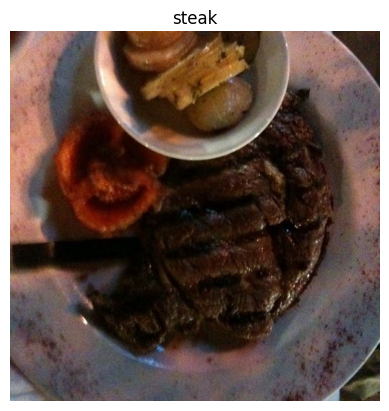

In [ ]:
#View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)


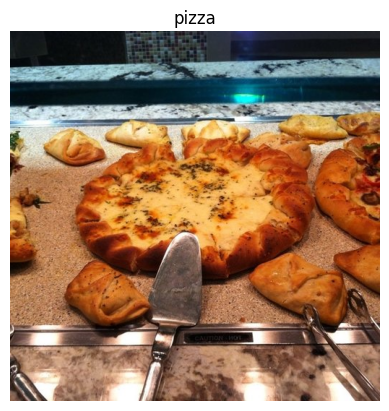

In [ ]:
#View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [ ]:
img

array([[[ 21,  26,  30],
        [ 17,  22,  26],
        [ 15,  20,  24],
        ...,
        [ 35,  36,  41],
        [ 37,  38,  43],
        [ 37,  38,  43]],

       [[ 21,  26,  30],
        [ 17,  22,  26],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 36,  37,  42],
        [ 36,  37,  42]],

       [[ 21,  26,  30],
        [ 16,  21,  25],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 35,  36,  41]],

       ...,

       [[134,  96,  73],
        [137,  99,  76],
        [139, 101,  80],
        ...,
        [ 84,  57,  48],
        [ 91,  63,  52],
        [ 82,  54,  43]],

       [[130,  92,  69],
        [137,  99,  76],
        [141, 103,  82],
        ...,
        [103,  75,  64],
        [ 87,  59,  48],
        [ 86,  58,  47]],

       [[130,  92,  69],
        [140, 102,  79],
        [143, 105,  84],
        ...,
        [129, 101,  90],
        [105,  77,  66],
        [ 86,  58,  47]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 21,  26,  30],
        [ 17,  22,  26],
        [ 15,  20,  24],
        ...,
        [ 35,  36,  41],
        [ 37,  38,  43],
        [ 37,  38,  43]],

       [[ 21,  26,  30],
        [ 17,  22,  26],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 36,  37,  42],
        [ 36,  37,  42]],

       [[ 21,  26,  30],
        [ 16,  21,  25],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 35,  36,  41]],

       ...,

       [[134,  96,  73],
        [137,  99,  76],
        [139, 101,  80],
        ...,
        [ 84,  57,  48],
        [ 91,  63,  52],
        [ 82,  54,  43]],

       [[130,  92,  69],
        [137,  99,  76],
        [141, 103,  82],
        ...,
        [103,  75,  64],
        [ 87,  59,  48],
        [ 86,  58,  47]],

       [[130,  92,  69],
        [140, 102,  79],
        [143, 105,  84],
        ...,
        [129, 101,  9

In [ ]:
img.shape #returns (width,height,colour channels)

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [ ]:
#Get all the pixel values between 0 & 1

img/255

array([[[0.08235294, 0.10196078, 0.11764706],
        [0.06666667, 0.08627451, 0.10196078],
        [0.05882353, 0.07843137, 0.09411765],
        ...,
        [0.1372549 , 0.14117647, 0.16078431],
        [0.14509804, 0.14901961, 0.16862745],
        [0.14509804, 0.14901961, 0.16862745]],

       [[0.08235294, 0.10196078, 0.11764706],
        [0.06666667, 0.08627451, 0.10196078],
        [0.05490196, 0.0745098 , 0.09019608],
        ...,
        [0.13333333, 0.1372549 , 0.15686275],
        [0.14117647, 0.14509804, 0.16470588],
        [0.14117647, 0.14509804, 0.16470588]],

       [[0.08235294, 0.10196078, 0.11764706],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.05490196, 0.0745098 , 0.09019608],
        ...,
        [0.13333333, 0.1372549 , 0.15686275],
        [0.13333333, 0.1372549 , 0.15686275],
        [0.1372549 , 0.14117647, 0.16078431]],

       ...,

       [[0.5254902 , 0.37647059, 0.28627451],
        [0.5372549 , 0.38823529, 0.29803922],
        [0.54509804, 0


# **A (typical) architecture of a convolutional neural network**

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:
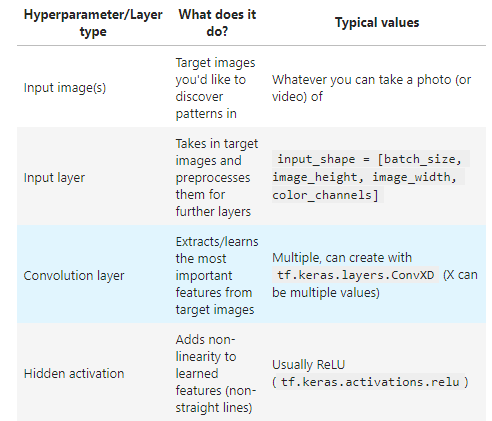

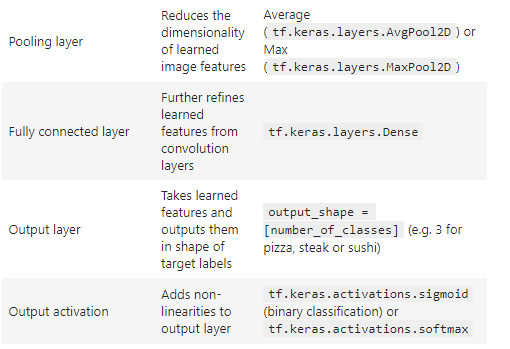


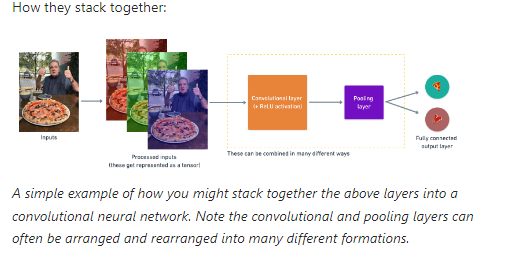

# An end-to-end example

Let's built a convolutional network to fing patterns in our images, more specifically we need way to



*   Load our images
*   Preprocess our images
*   Built a CNN to find patterns in our images
*   Compile our CNN
*   Fit the CNN to our training data







In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 136ms/step - loss: 0.5590 - accuracy: 0.7273 - val_loss: 0.5015 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4567 - accuracy: 0.7867 - val_loss: 0.4753 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4308 - accuracy: 0.8153 - val_loss: 0.4301 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3787 - accuracy: 0.8393 - val_loss: 0.3711 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3124 - accuracy: 0.8760 - val_loss: 0.3546 - val_accuracy: 0.8240


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# We can get exact same as before

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3),
  # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.Activation(tf.nn.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 146ms/step - loss: 0.5376 - accuracy: 0.7407 - val_loss: 0.4724 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4525 - accuracy: 0.7973 - val_loss: 0.3735 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4008 - accuracy: 0.8253 - val_loss: 0.3352 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3609 - accuracy: 0.8547 - val_loss: 0.3108 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3170 - accuracy: 0.8747 - val_loss: 0.2869 - val_accuracy: 0.8920


# Using the same model as before

In [ ]:
#Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = 224,224,3),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="sigmoid"),

])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use the same training data created above
                        epochs = 5,
                        steps_per_epoch = len(tain_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

                        )



SyntaxError: ignored